In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from google.colab import files

In [3]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
toyota = pd.read_csv(file_name)

Saving toyota.csv.unknown to toyota.csv.unknown


In [4]:
print(toyota.tail())

        Id                                              Model  Price  \
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type     HP  Met_Color  ...  \
1431         69         12      1998  20544    Petrol   86.0          1  ...   
1432         72          9      1998  19000    Petrol   86.0          0  ...   
1433         71         10      1998  17016    Petrol   86.0          0  ...   
1434         70         11      1998  16916    Petrol   86.0          1  ...   
1435         76          5      1998      1    Petrol  110.0          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
1431          

In [5]:
toyota.shape

(1436, 38)

In [6]:
toyota.info

<bound method DataFrame.info of         Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type     HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90.0          1  ...   
1            23         10      2002  72937    Diesel   90.0          1  ...   
2            24          9      2002  41711    Diesel   90.0          1  ...   
3            26          7      2002  48000    Diesel   90.0          0  ...   
4            30          3      2002  38500    Diesel   90.0          0  ...   
...         ...        ...       ...    ...       ...    ...        ...  ...   
1431         69         12      1998  20544    Petrol   86.0          1  ...   
1432         72          9      1998  19000    Petrol   86.0          0  ...   
1433         71         10      1998  17016    Petrol   86.0          0  ...   
1434         70         11      1998  16916    Petrol   86.0          1  ...   
1435         76          5      1998      1    Petrol  110.0          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]>

In [7]:
print(toyota.head())

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type    HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90.0          1  ...            1   
1         10      2002  72937    Diesel  90.0          1  ...            1   
2          9      2002  41711    Diesel  90.0          1  ...            0   
3          7      2002  48000    Diesel  90.0          0  ...            0   
4          3      2002  38500    Diesel  90.0          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0          

In [8]:
toyota.corr(numeric_only=True)


,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.110880,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.317251,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.157875,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.040047,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.166161,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333913,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.110880,0.317251,-0.157875,-0.040047,0.166161,-0.333913,1.000000,0.059263,0.012967,0.036326,...,0.250942,0.266459,0.048975,0.020697,0.210234,-0.006064,0.011320,0.206492,0.019619,0.067843
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.059263,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.012967,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.036326,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [9]:
toyota.isnull()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
sns.pairplot(toyota)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age_08_04'}>,
        <Axes: title={'center': 'Mfg_Month'}>,
        <Axes: title={'center': 'Mfg_Year'}>,
        <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Met_Color'}>,
        <Axes: title={'center': 'Automatic'}>,
        <Axes: title={'center': 'cc'}>,
        <Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Cylinders'}>],
       [<Axes: title={'center': 'Gears'}>,
        <Axes: title={'center': 'Quarterly_Tax'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Mfr_Guarantee'}>,
        <Axes: title={'center': 'BOVAG_Guarantee'}>,
        <Axes: title={'center': 'Guarantee_Period'}>],
       [<Axes: title={'center': 'ABS'}>,
        <Axes: title={'center': 'Airbag_1'}>,
        <Axes: title={'center': 'Airbag_2'}>,
        <Axes: title={'center': 'Airco'}>

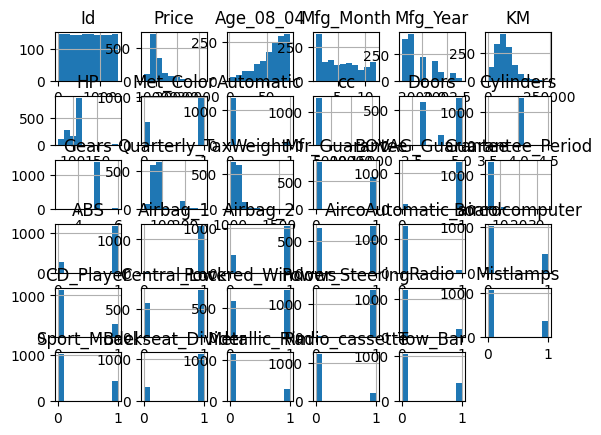

In [11]:
toyota.hist()

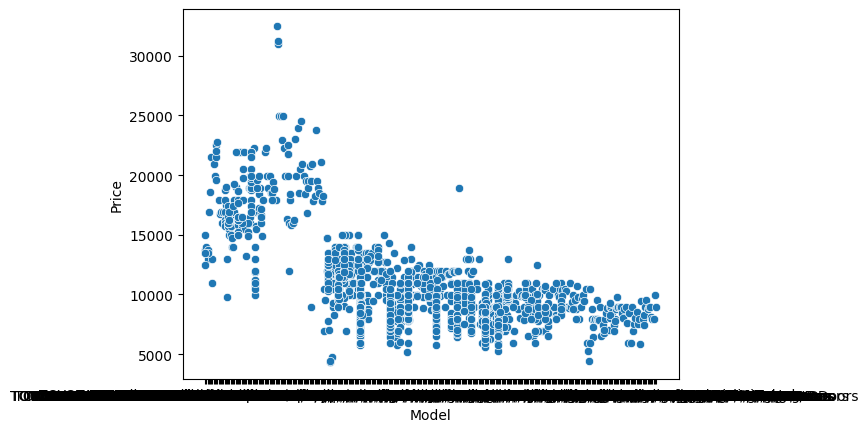

In [13]:
sns.scatterplot(x='Model',y='Price',data=toyota)
plt.show()

In [14]:
import statsmodels.formula.api as smf
model=smf.ols('Id~Price+Weight+Model+Age_08_04+Doors',data=toyota).fit()

In [15]:
model.params

,0
Intercept,2284.425939
Model[T.TOYOTA Corolla ! 1.6-16v vvt-i sol airco sedan 4/5-Doors],-940.051436
Model[T.TOYOTA Corolla 1 6-16v VVT-i Linea Terra Comfort Airco 5drs 4/5-Doors],-484.343782
Model[T.TOYOTA Corolla 1.3 16V 2/3-Doors],-1023.587544
Model[T.TOYOTA Corolla 1.3 16V HATCHB 2/3-Doors],-749.270755
...,...
Model[T. TOYOTA Corolla VERSO 2.0 D4D SOL (7) BNS MPV],222.486175
Price,0.012053
Weight,-1.973658
Age_08_04,22.128647


In [16]:
print(model.tvalues, '\n', model.pvalues)

Intercept                                                                          1.641766
Model[T.TOYOTA Corolla ! 1.6-16v vvt-i sol airco sedan 4/5-Doors]                 -2.295414
Model[T.TOYOTA Corolla 1 6-16v VVT-i Linea Terra Comfort Airco 5drs 4/5-Doors]    -1.171835
Model[T.TOYOTA Corolla 1.3 16V 2/3-Doors]                                         -2.160942
Model[T.TOYOTA Corolla 1.3 16V HATCHB 2/3-Doors]                                  -1.607155
                                                                                    ...    
Model[T. TOYOTA Corolla VERSO 2.0 D4D SOL (7) BNS MPV]                             0.803936
Price                                                                              2.709375
Weight                                                                            -2.149644
Age_08_04                                                                         28.379151
Doors                                                                           

In [17]:
(model.rsquared, model.rsquared_adj)

(0.9105154200455425, 0.8788581394012769)

In [19]:
ml_v=smf.ols('Id~HP',data=toyota).fit()
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    13.837492
HP           -4.221937
dtype: float64 
 Intercept    5.777504e-41
HP           2.574664e-05
dtype: float64


In [21]:
ml_wv=smf.ols('Id~KM+HP',data=toyota).fit()
print(ml_wv.tvalues, '\n', ml_wv.pvalues)

Intercept    6.806152
KM           9.841104
HP          -0.824569
dtype: float64 
 Intercept    1.469924e-11
KM           3.712101e-22
HP           4.097536e-01
dtype: float64


In [22]:
(ml_wv.rsquared, ml_wv.rsquared_adj)

(0.07490319217508101, 0.07361025463793913)

In [25]:
rsq_KMS = smf.ols('KM~HP',data=toyota).fit().rsquared
vif_KMS = 1/(1-rsq_KMS)
rsq_HP = smf.ols('HP~KM',data=toyota).fit().rsquared
vif_HP = 1/(1-rsq_HP)
rsq_Gears = smf.ols('Gears~KM+HP',data=toyota).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)
rsq_Weight = smf.ols('Weight~KM+HP+Gears',data=toyota).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)
d1 = {'Variables':['KMS','HP','Gears','Weight'],'VIF':[vif_KMS,vif_HP,vif_Gears,vif_Weight]}
Vif_frame = pd.DataFrame(d1)


Vif_frame

,Variables,VIF
0,KMS,1.125490
1,HP,1.125490
2,Gears,1.054813
3,Weight,1.008516


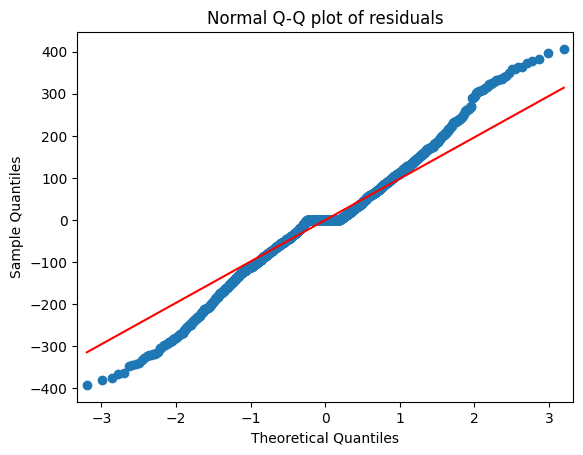

In [26]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

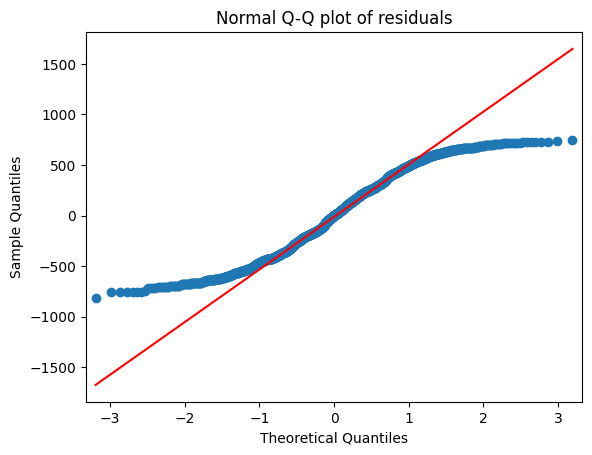

In [27]:
import statsmodels.api as sm
qqplot=sm.qqplot(ml_v.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [29]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

<function matplotlib.pyplot.show(close=None, block=None)>

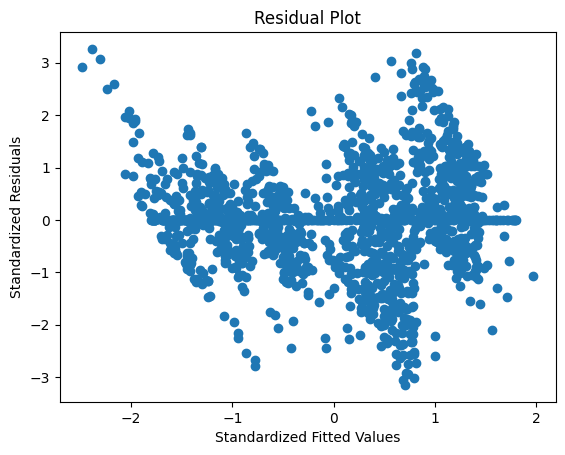

In [30]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residuals')
plt.show

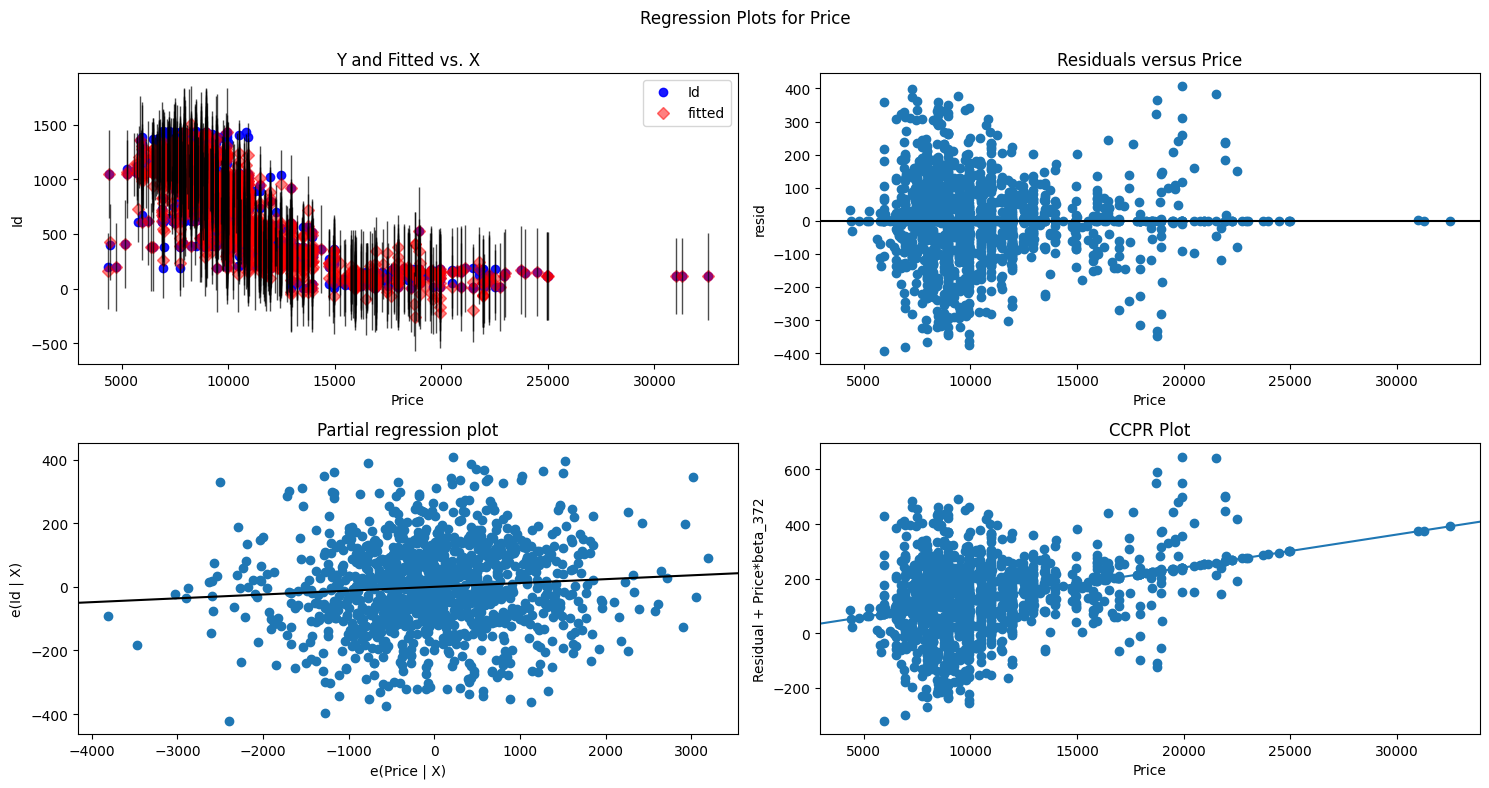

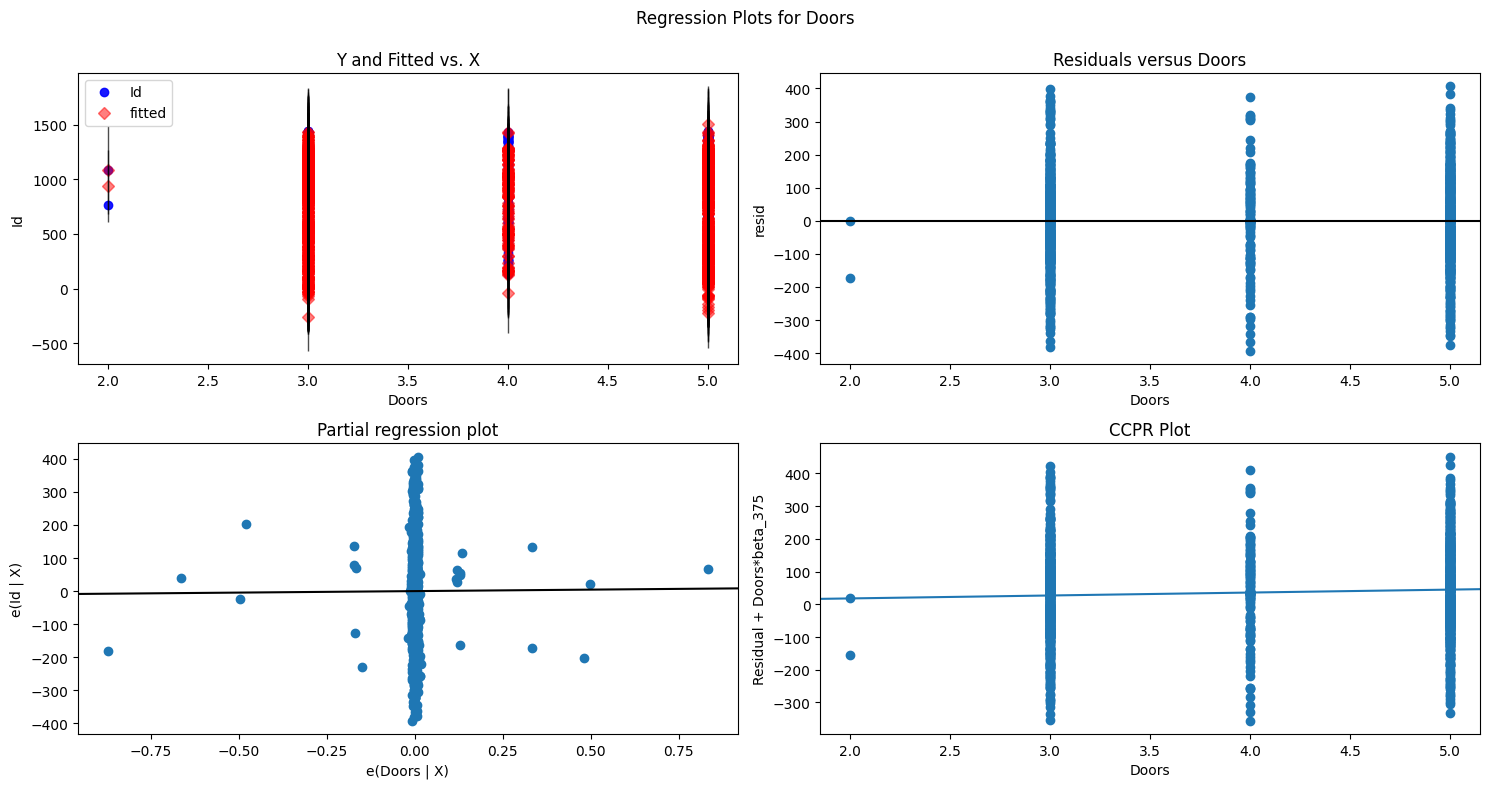

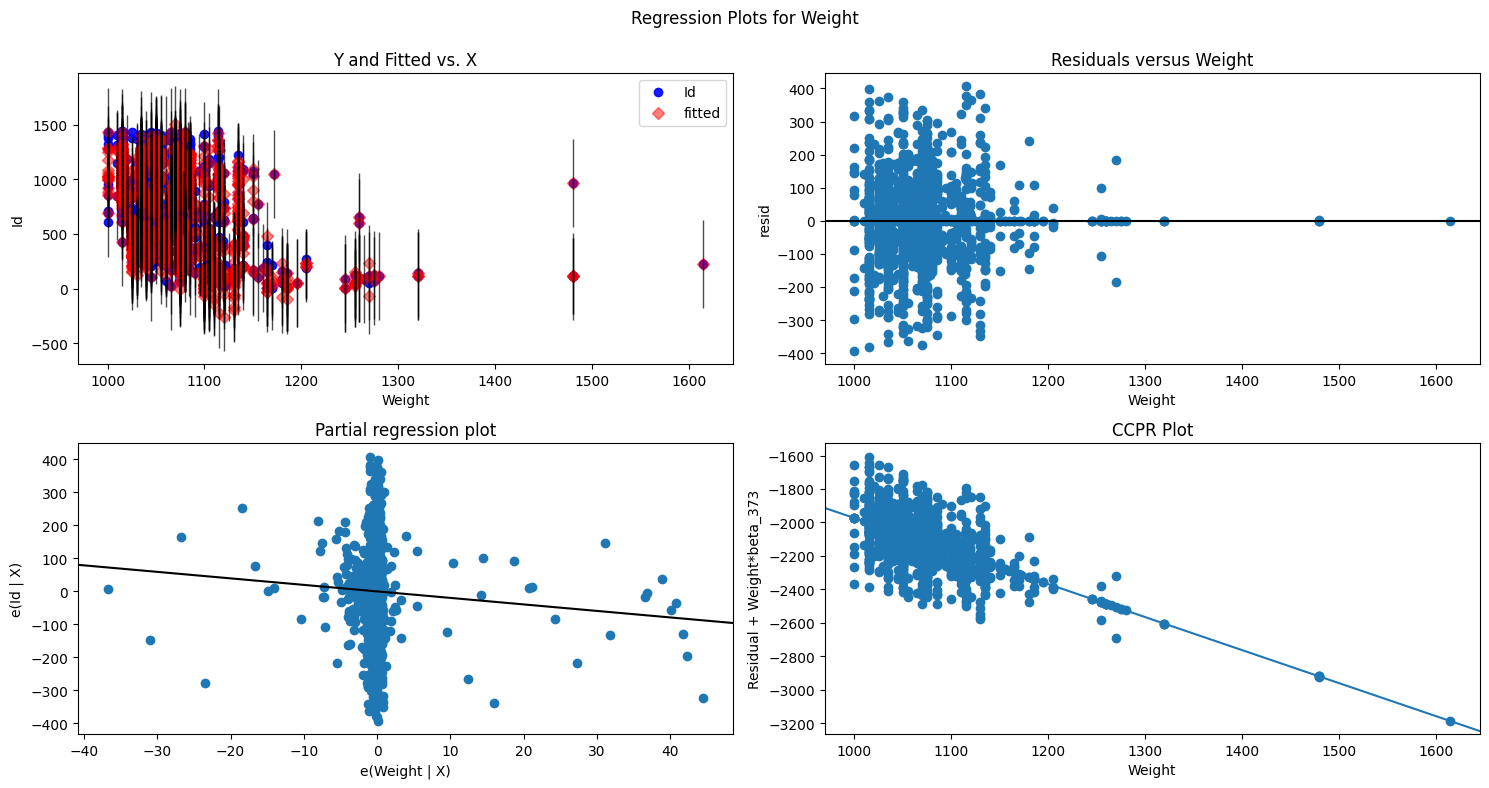

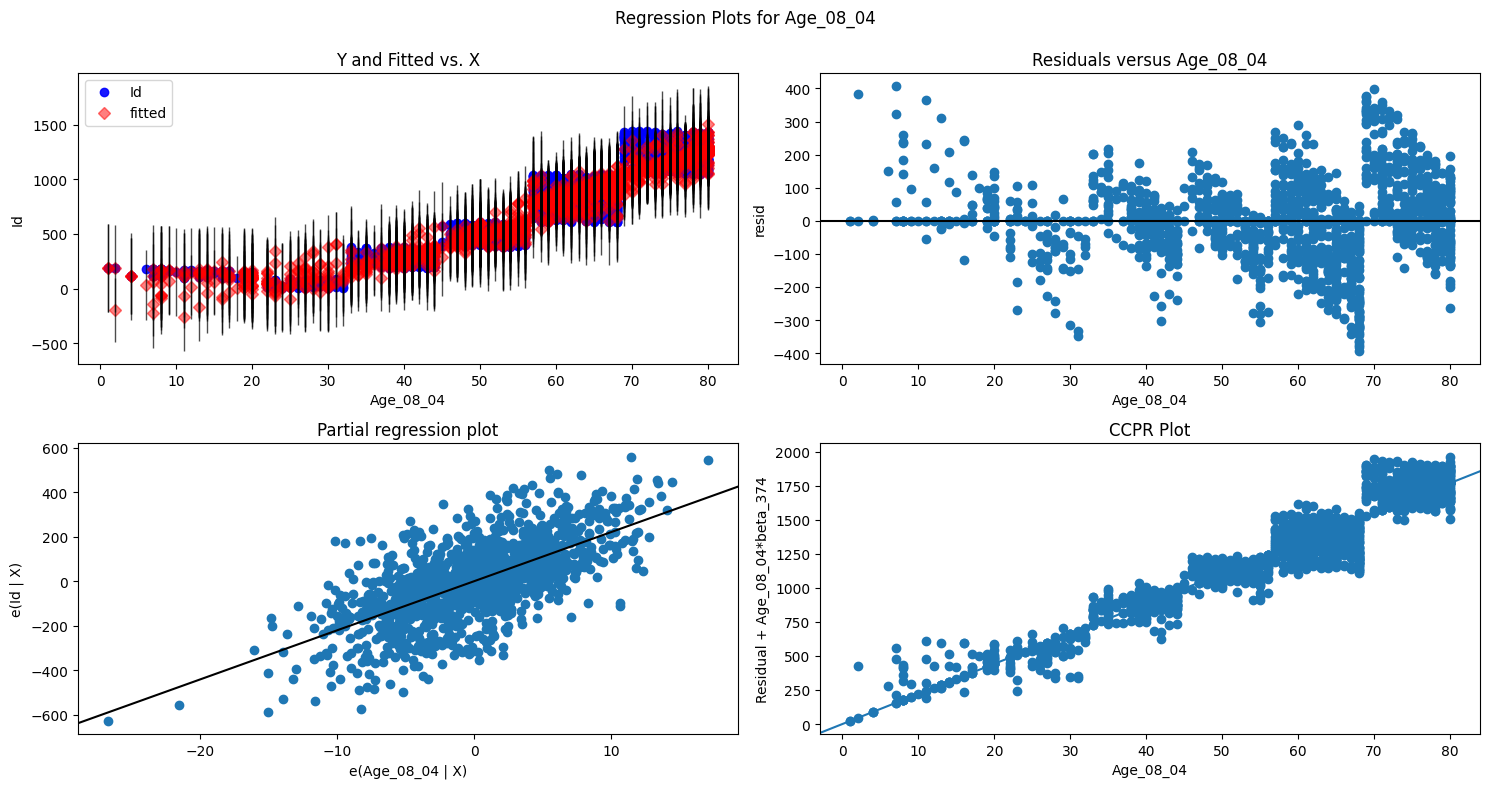

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Price", fig=fig)
plt.show()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()


In [32]:
mode_influence = model.get_influence()
(c, _) = mode_influence.cooks_distance

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:847: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


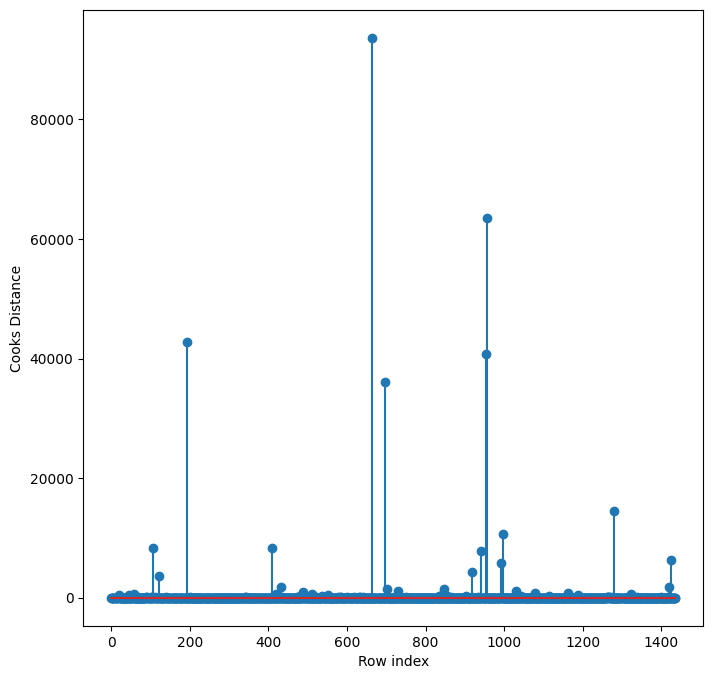

In [34]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 8))
ax.stem(np.arange(len(toyota)), np.round(c, 3))
ax.set_xlabel('Row index')
ax.set_ylabel('Cooks Distance')
plt.show()